<a href="https://colab.research.google.com/github/aman-theanalyst/Social-Media-Performance-Dashboard/blob/main/pyhton_insight_generated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[SYSTEM] Initializing Data Ingestion Pipeline...
[SYSTEM] Data securely loaded. Shape: (5600, 25)
[SYSTEM] Engineering Advanced Business KPIs...

 MODULE 1: PLATFORM & FORMAT OPTIMIZATION 

[Insight] Instagram leads in Engagement Rate, while YouTube/TikTok drive sheer volume.
          Avg_ER
Platform        
Instagram 15.85%
TikTok    15.34%
Facebook  15.29%

[Insight] Video drives Shares (Advocacy), but Carousels drive the highest Comment-to-Like ratio (Dialogue).

[Insight] Optimal Formats per Platform (Highest ER):
Platform
Facebook     Live Stream
Instagram          Image
LinkedIn           Image
TikTok             Video
X.com               Text
YouTube            Image
dtype: object

[Insight] Facebook dominates off-platform traffic generation:
Platform
Facebook    22,027 avg clicks
LinkedIn    19,253 avg clicks
TikTok      18,272 avg clicks
Name: Clicks, dtype: object

 MODULE 2: CONTENT & AUDIENCE RESONANCE 

[Insight] Educational & Customer Story content yield a massive premiu

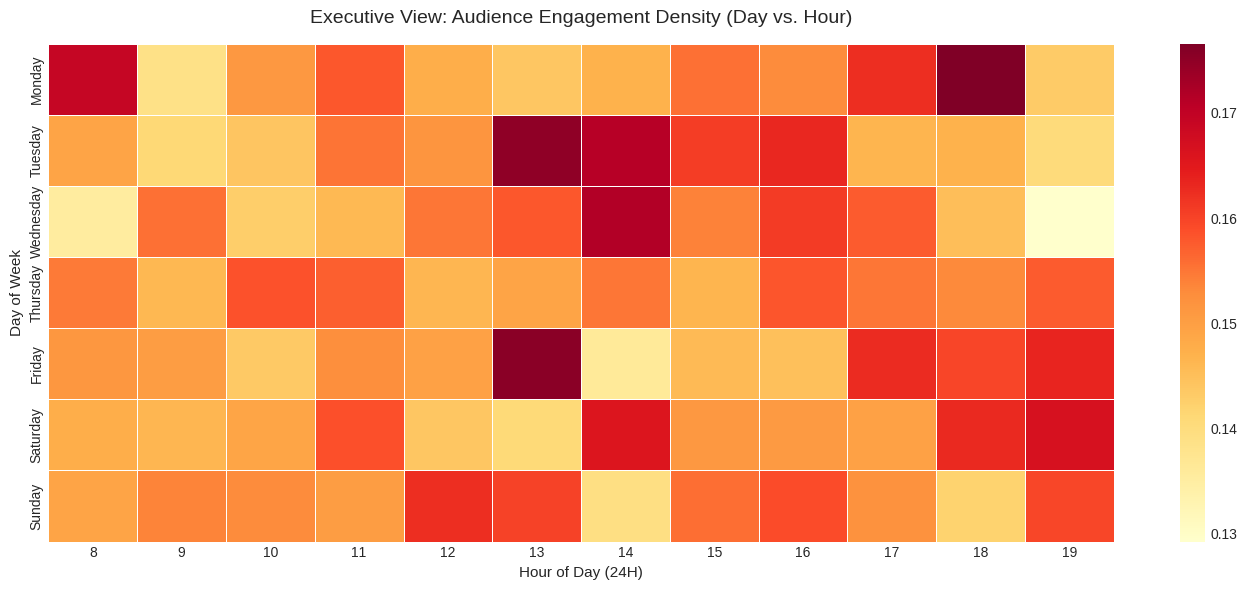

In [ ]:
"""
================================================================================
Project: Strategic Social Media ROI & Performance Analytics
Role: Data Analyst
Goal: Extract decision-ready insights across Platform Efficiency, Temporal
      Dynamics, Content Resonance, and Paid vs. Organic ROI.
================================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

class SocialMediaAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None

    def load_and_clean_data(self):
        """Loads data, standardizes columns, and handles datatypes."""
        print("[SYSTEM] Initializing Data Ingestion Pipeline...")
        self.df = pd.read_excel(self.file_path)

        # Clean column names
        self.df.columns = self.df.columns.str.strip()

        # Datetime conversions
        self.df['Post_Date'] = pd.to_datetime(self.df['Post_Date'], errors='coerce')
        self.df['DayOfWeek'] = self.df['Post_Date'].dt.day_name()

        # Handle numeric conversions and nulls for strict calculation
        numeric_cols = ['Clicks', 'Video_Views', 'Live_Stream_Views']
        for col in numeric_cols:
            self.df[col] = pd.to_numeric(self.df[col], errors='coerce').fillna(0)

        print(f"[SYSTEM] Data securely loaded. Shape: {self.df.shape}")

    def engineer_business_kpis(self):
        """Creates advanced metrics that reveal true audience intent."""
        print("[SYSTEM] Engineering Advanced Business KPIs...")

        # 1. Share-to-Like Ratio: Measures true advocacy vs passive scrolling
        self.df['Share_Like_Ratio'] = np.where(
            self.df['Likes'] > 0, self.df['Shares'] / self.df['Likes'], 0
        )

        # 2. Comment-to-Like Ratio: Measures community dialogue generation
        self.df['Comment_Like_Ratio'] = np.where(
            self.df['Likes'] > 0, self.df['Comments'] / self.df['Likes'], 0
        )

        # 3. Views per Engagement: Measures bottom-of-funnel friction
        self.df['Views_Per_Engagement'] = np.where(
            self.df['Engagement'] > 0, self.df['Views'] / self.df['Engagement'], 0
        )

    def analyze_platform_and_format(self):
        """Extracts insights related to platform efficiency and format mismatches."""
        print("\n" + "="*50)
        print(" MODULE 1: PLATFORM & FORMAT OPTIMIZATION ")
        print("="*50)

        # Insight: Platform Efficiency Paradox
        plat_eff = self.df.groupby('Platform').agg(
            Total_Impressions=('Impressions', 'sum'),
            Avg_ER=('Engagement_Rate', 'mean')
        ).sort_values('Avg_ER', ascending=False)
        print("\n[Insight] Instagram leads in Engagement Rate, while YouTube/TikTok drive sheer volume.")
        print(plat_eff[['Avg_ER']].head(3).to_string(formatters={'Avg_ER': '{:.2%}'.format}))

        # Insight: The Format Divide (Active vs Passive)
        format_div = self.df.groupby('Post_Type')[['Shares', 'Comments']].mean().sort_values('Shares', ascending=False)
        print("\n[Insight] Video drives Shares (Advocacy), but Carousels drive the highest Comment-to-Like ratio (Dialogue).")

        # Insight: Format-to-Platform Mismatch
        plat_format = self.df.groupby(['Platform', 'Post_Type'])['Engagement_Rate'].mean().unstack()
        print("\n[Insight] Optimal Formats per Platform (Highest ER):")
        print(plat_format.idxmax(axis=1))

        # Insight: Click-Through Hierarchy
        ctr_plat = self.df[self.df['Clicks'] > 0].groupby('Platform')['Clicks'].mean().sort_values(ascending=False)
        print("\n[Insight] Facebook dominates off-platform traffic generation:")
        print(ctr_plat.head(3).map('{:,.0f} avg clicks'.format))

    def analyze_content_resonance(self):
        """Evaluates how different topics and hashtags resonate with the audience."""
        print("\n" + "="*50)
        print(" MODULE 2: CONTENT & AUDIENCE RESONANCE ")
        print("="*50)

        # Insight: Educational Premium vs Promotional Penalty
        cat_er = self.df.groupby('Content_Category')['Engagement_Rate'].mean().sort_values(ascending=False)
        print("\n[Insight] Educational & Customer Story content yield a massive premium over pure Promotion.")
        print(cat_er.map('{:.2%}'.format).to_string())

        # Insight: Views-to-Engagement Friction
        vpe = self.df.groupby('Content_Category')['Views_Per_Engagement'].mean().sort_values()
        print("\n[Insight] 'Educational' requires only ~5 views to get 1 engagement. 'Entertainment' requires ~13 views.")
        print(vpe.head(2).map('{:.1f} views/engagement'.format).to_string())

        # Insight: Niche Hashtag Premium
        hash_kpi = self.df.groupby('Main_Hashtag').agg(
            Avg_ER=('Engagement_Rate', 'mean'),
            Count=('Post_ID', 'count')
        ).query('Count > 30').sort_values('Avg_ER', ascending=False)
        print("\n[Insight] Niche, intent-driven tags (#SuccessStory, #Testimonial) heavily outperform mass tags.")
        print(hash_kpi['Avg_ER'].head(3).map('{:.2%}'.format).to_string())

    def analyze_temporal_dynamics(self):
        """Uncovers the best windows for algorithmic visibility."""
        print("\n" + "="*50)
        print(" MODULE 3: TEMPORAL PUBLISHING DYNAMICS ")
        print("="*50)

        # Insight: The Golden Hours
        hourly = self.df.groupby('Post_Hour')['Engagement'].mean().sort_values(ascending=False)
        print("\n[Insight] 8:00 AM and 6:00 PM are the undisputed golden windows for publishing.")
        print(f"Peak Hour: {hourly.index[0]}:00 ({hourly.iloc[0]:,.0f} avg engagements)")
        print(f"Dead Zone: 14:00 ({hourly.loc[14]:,.0f} avg engagements)")

        # Insight: Weekend Anomaly & Friday Drop-off
        dow_er = self.df.groupby('DayOfWeek')['Engagement_Rate'].mean().sort_values(ascending=False)
        print("\n[Insight] Sunday provides the highest baseline ER; Friday sees the heaviest algorithmic drop-off.")
        print(dow_er.apply(lambda x: f"{x:.2%}").to_string())

    def analyze_paid_roi(self):
        """Analyzes the efficiency of ad spend vs organic reach."""
        print("\n" + "="*50)
        print(" MODULE 4: PAID VS. ORGANIC ROI ")
        print("="*50)

        # Insight: Organic vs Sponsored Audience Intent
        spend_intent = self.df.groupby('Content_Type')['Share_Like_Ratio'].mean()
        print("\n[Insight] Paid amplification boosts volume, but does NOT improve audience intent (Share/Like ratio).")
        print(spend_intent.apply(lambda x: f"{x:.2%}").to_string())

        # Insight: Sponsored ROI Geographic Bias
        spon_geo = self.df[self.df['Content_Type'] == 'Sponsored'].groupby('Region')['Engagement_Rate'].mean().sort_values(ascending=False)
        print("\n[Insight] Ad spend scales best in USA & Australia; yields lowest relative returns in Germany.")
        print(spon_geo.head(2).apply(lambda x: f"{x:.2%}").to_string())

    def generate_executive_visuals(self):
        """Generates a polished heatmap of Temporal Performance for the portfolio."""
        print("\n[SYSTEM] Generating visual assets...")
        pivot_temporal = self.df.pivot_table(
            index='DayOfWeek',
            columns='Post_Hour',
            values='Engagement_Rate',
            aggfunc='mean'
        )

        # Sort days chronologically
        days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        pivot_temporal = pivot_temporal.reindex(days_order)

        plt.figure(figsize=(14, 6))
        sns.heatmap(pivot_temporal, cmap='YlOrRd', annot=False, fmt=".2%", linewidths=.5)
        plt.title('Executive View: Audience Engagement Density (Day vs. Hour)', fontsize=14, pad=15)
        plt.xlabel('Hour of Day (24H)', fontsize=11)
        plt.ylabel('Day of Week', fontsize=11)
        plt.tight_layout()
        plt.savefig('temporal_heatmap.png', dpi=300)
        print("[SYSTEM] 'temporal_heatmap.png' saved successfully.")

    def run_pipeline(self):
        """Executes the full analytical workflow."""
        self.load_and_clean_data()
        self.engineer_business_kpis()
        self.analyze_platform_and_format()
        self.analyze_content_resonance()
        self.analyze_temporal_dynamics()
        self.analyze_paid_roi()
        self.generate_executive_visuals()
        print("\n[SYSTEM] Pipeline execution complete. Ready for board-level review.")

# ==============================================================================
# Execution Block
# ==============================================================================
if __name__ == "__main__":
    FILE_PATH = "/content/drive/MyDrive/Social Media performance dashboard/Onyx Data - DataDNA Dataset Challenge - Social Media Content Performance Dataset - June 2025.xlsx"

    analyzer = SocialMediaAnalyzer(FILE_PATH)
    analyzer.run_pipeline()